# Big Data Pipeline Visualization
    This notebook visualizes the results of our Hadoop and Hive big data pipeline.",
    We'll create visualizations for:
    1. Web traffic patterns
    2. Social media engagement
    3. Sensor data analysis
    4. Correlations between different data sources

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set plot style
plt.style.use('ggplot')
sns.set(style="whitegrid")

# Create directory for saving visualizations
os.makedirs('../visualization', exist_ok=True)

In [3]:
# Define paths to the exported data
exports_dir = '../data/exports/'
web_traffic_path = os.path.join(exports_dir, 'web_traffic_by_endpoint')
web_hourly_path = os.path.join(exports_dir, 'web_traffic_hourly')
social_path = os.path.join(exports_dir, 'social_engagement')
sensor_path = os.path.join(exports_dir, 'sensor_readings')
correlation_path = os.path.join(exports_dir, 'correlation_data')

# Function to load data from CSV files
def load_data(path, filename='000000_0'):
    # Check if the file exists
    full_path = os.path.join(path, filename)
    if not os.path.exists(full_path):
        print(f"Warning: File not found at {full_path}")
        # Try to find any file in the directory
        files = os.listdir(path)
        if files:
            full_path = os.path.join(path, files[0])
            print(f"Using file: {full_path}")
        else:
            print(f"No files found in {path}")
            return None
    
    # Load the data
    try:
        # Determine column names based on the path
        if 'web_traffic_by_endpoint' in path:
            cols = ['date', 'endpoint', 'total_requests', 'error_count', 'avg_response_time', 'unique_visitors']
        elif 'web_traffic_hourly' in path:
            cols = ['date', 'hour', 'total_requests', 'error_count', 'avg_response_time']
        elif 'social_engagement' in path:
            cols = ['date', 'platform', 'category', 'post_count', 'total_likes', 'total_shares', 
                   'total_comments', 'avg_engagement', 'avg_sentiment']
        elif 'sensor_readings' in path:
            cols = ['date', 'sensor_type', 'location', 'reading_count', 'avg_value', 'min_value', 
                   'max_value', 'active_readings', 'error_readings']
        elif 'correlation_data' in path:
            cols = ['date', 'total_requests', 'error_count', 'avg_response_time', 'post_count', 
                   'total_likes', 'total_shares', 'total_comments', 'avg_engagement', 'avg_sentiment']
        else:
            cols = None
            
        # Read the CSV file
        df = pd.read_csv(full_path, header=None, names=cols)
        
        # Convert date columns
        if 'date' in df.columns:
            df['date'] = pd.to_datetime(df['date'])
            
        return df
    
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

# Load all datasets
web_traffic_df = load_data(web_traffic_path)
web_hourly_df = load_data(web_hourly_path)
social_df = load_data(social_path)
sensor_df = load_data(sensor_path)
correlation_df = load_data(correlation_path)

# Display data info
for name, df in [
    ('Web Traffic by Endpoint', web_traffic_df),
    ('Web Traffic by Hour', web_hourly_df),
    ('Social Engagement', social_df),
    ('Sensor Readings', sensor_df),
    ('Correlation Data', correlation_df)
]:
    if df is not None:
        print(f"\n{name} Dataset - Shape: {df.shape}")
        display(df.head(2))
    else:
        print(f"\n{name} Dataset - Not loaded")


Web Traffic by Endpoint Dataset - Shape: (64, 6)


,date,endpoint,total_requests,error_count,avg_response_time,unique_visitors
0,2025-03-02,/about,21,14,1.385905,21
1,2025-03-02,/blog,20,12,0.982950,20



Web Traffic by Hour Dataset - Shape: (169, 5)


,date,hour,total_requests,error_count,avg_response_time
0,2025-03-02,11,5,3,0.778000
1,2025-03-02,12,14,7,0.892714



Social Engagement Dataset - Shape: (128, 9)


,date,platform,category,post_count,total_likes,total_shares,total_comments,avg_engagement,avg_sentiment
0,2025-03-02,facebook,general,4,1460,463,94,667.0,0.0
1,2025-03-02,facebook,product,4,814,392,62,446.0,0.0



Sensor Readings Dataset - Shape: (200, 9)


,date,sensor_type,location,reading_count,avg_value,min_value,max_value,active_readings,error_readings
0,2025-03-02,co2,basement,15,788.800000,462.0,1193.0,14,1
1,2025-03-02,co2,outside,6,814.666667,542.0,1111.0,6,0



Correlation Data Dataset - Shape: (8, 10)


,date,total_requests,error_count,avg_response_time,post_count,total_likes,total_shares,total_comments,avg_engagement,avg_sentiment
0,2025-03-02,136,86,1.081610,69,29953,7176,1636,713.231884,0.043478
1,2025-03-03,276,175,1.033986,118,56802,12869,2930,773.983051,-0.025424


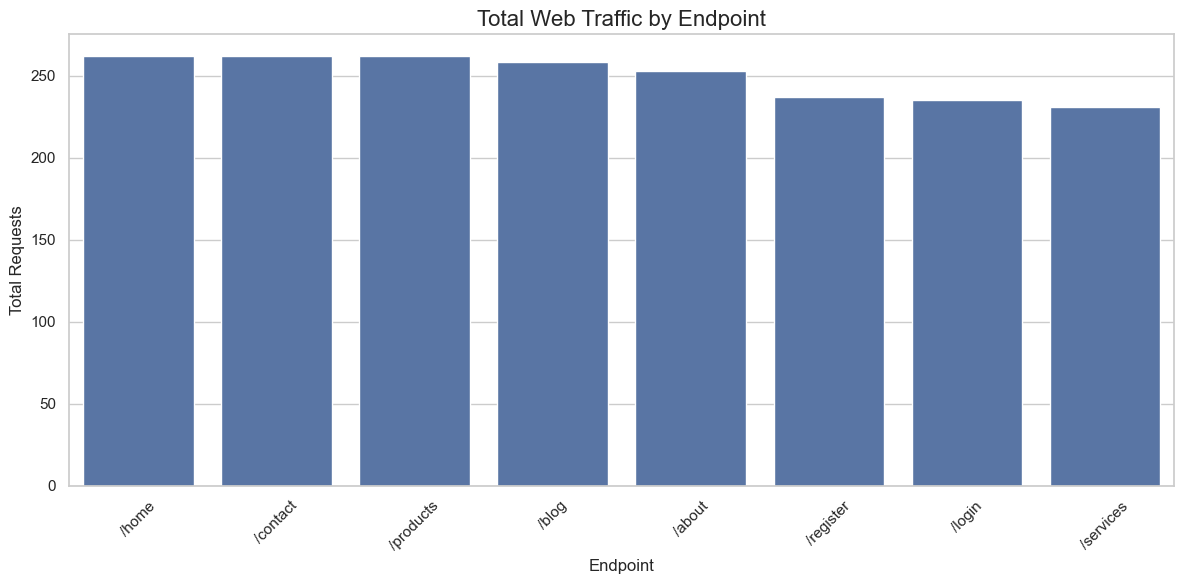

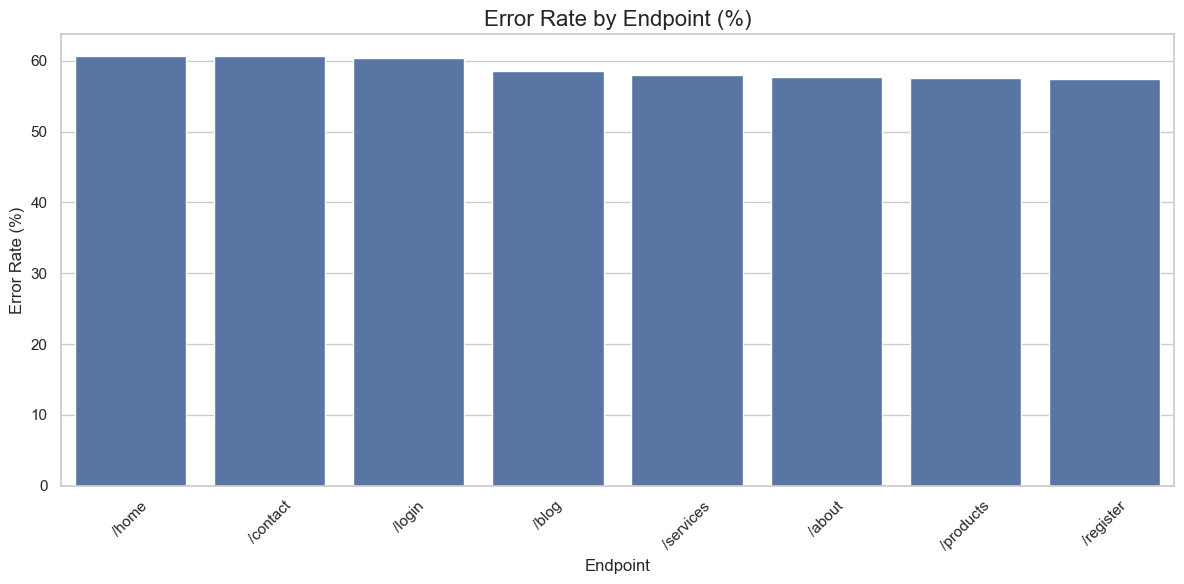

In [5]:
# Check if data is loaded
if web_traffic_df is not None:
    # 1. Plot traffic by endpoint
    plt.figure(figsize=(12, 6))
    
    # Group data by endpoint and sum requests
    endpoint_data = web_traffic_df.groupby('endpoint')['total_requests'].sum().sort_values(ascending=False)
    
    # Create bar chart
    ax = sns.barplot(x=endpoint_data.index, y=endpoint_data.values)
    plt.title('Total Web Traffic by Endpoint', fontsize=16)
    plt.xlabel('Endpoint', fontsize=12)
    plt.ylabel('Total Requests', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Save the figure
    plt.savefig('../visualization/web_traffic_by_endpoint.png', dpi=300)
    plt.show()
    
    # 2. Plot error rates by endpoint
    plt.figure(figsize=(12, 6))
    
    # Calculate error rates
    endpoint_groups = web_traffic_df.groupby('endpoint')
    error_rates = (endpoint_groups['error_count'].sum() / endpoint_groups['total_requests'].sum() * 100).sort_values(ascending=False)
    
    # Create bar chart
    ax = sns.barplot(x=error_rates.index, y=error_rates.values)
    plt.title('Error Rate by Endpoint (%)', fontsize=16)
    plt.xlabel('Endpoint', fontsize=12)
    plt.ylabel('Error Rate (%)', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Save the figure
    plt.savefig('../visualization/error_rate_by_endpoint.png', dpi=300)
    plt.show()
    
    # 3. Interactive visualization of traffic over time using Plotly
    if web_hourly_df is not None:
        # Group hourly data by date and hour
        hourly_traffic = web_hourly_df.copy()
        hourly_traffic['datetime'] = hourly_traffic['date'] + pd.to_timedelta(hourly_traffic['hour'], unit='h')
        
        # Create line chart
        fig = px.line(hourly_traffic, x='datetime', y='total_requests', 
                     title='Web Traffic Over Time (Hourly)')
        fig.update_layout(
            xaxis_title='Date and Hour',
            yaxis_title='Total Requests',
            template='plotly_white'
        )
        
        # Show the figure
        fig.show()
        
        # Save as HTML
        fig.write_html('../visualization/hourly_traffic.html')
        
else:
    print("Web traffic data not available for visualization")

<Figure size 1200x800 with 0 Axes>

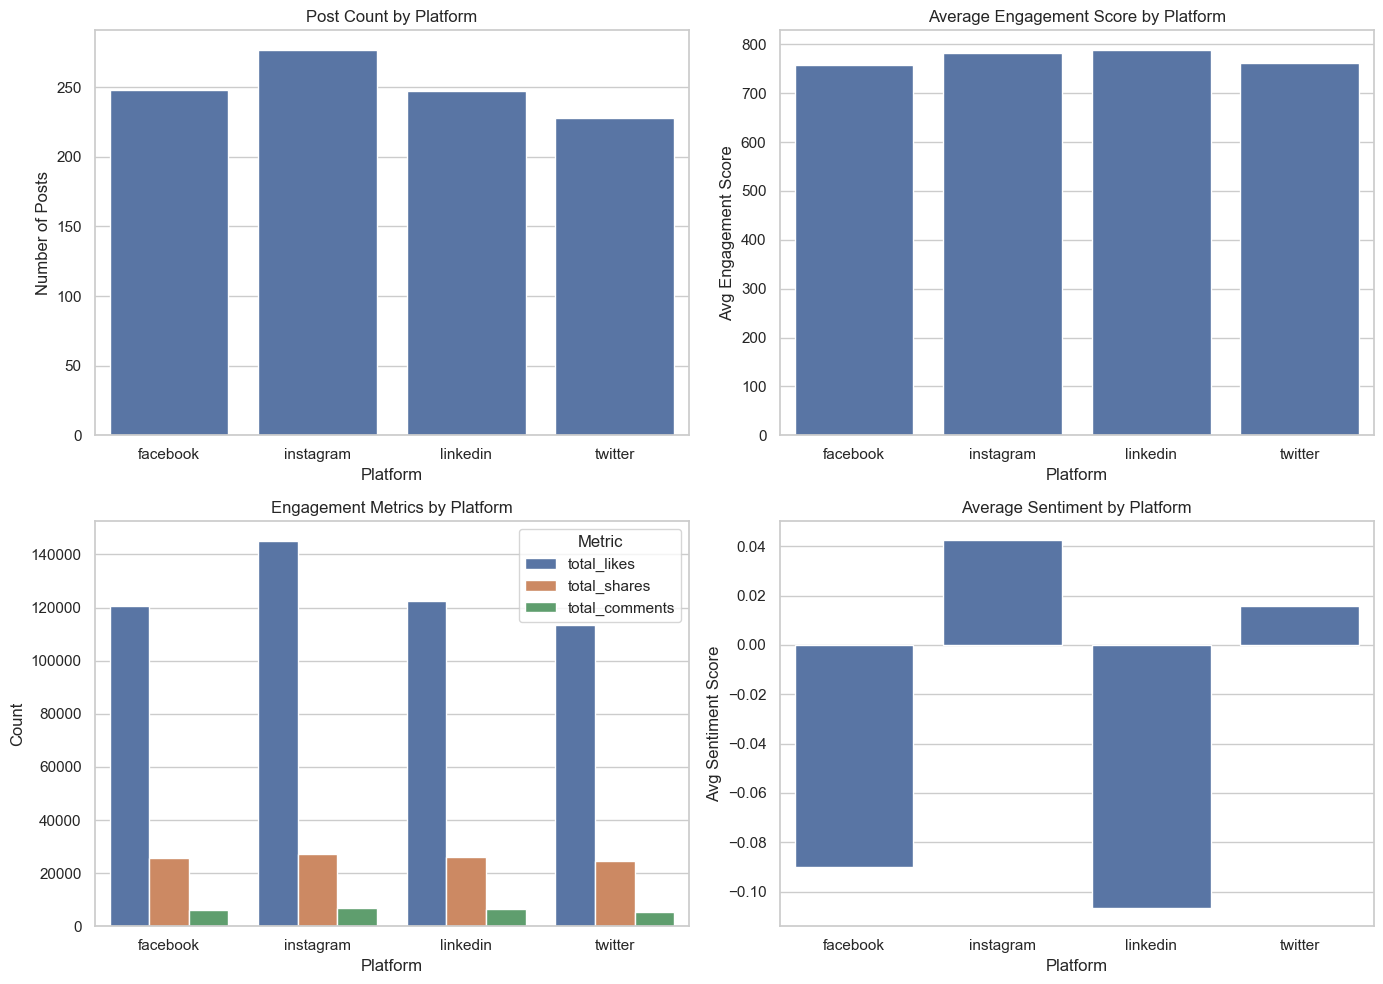

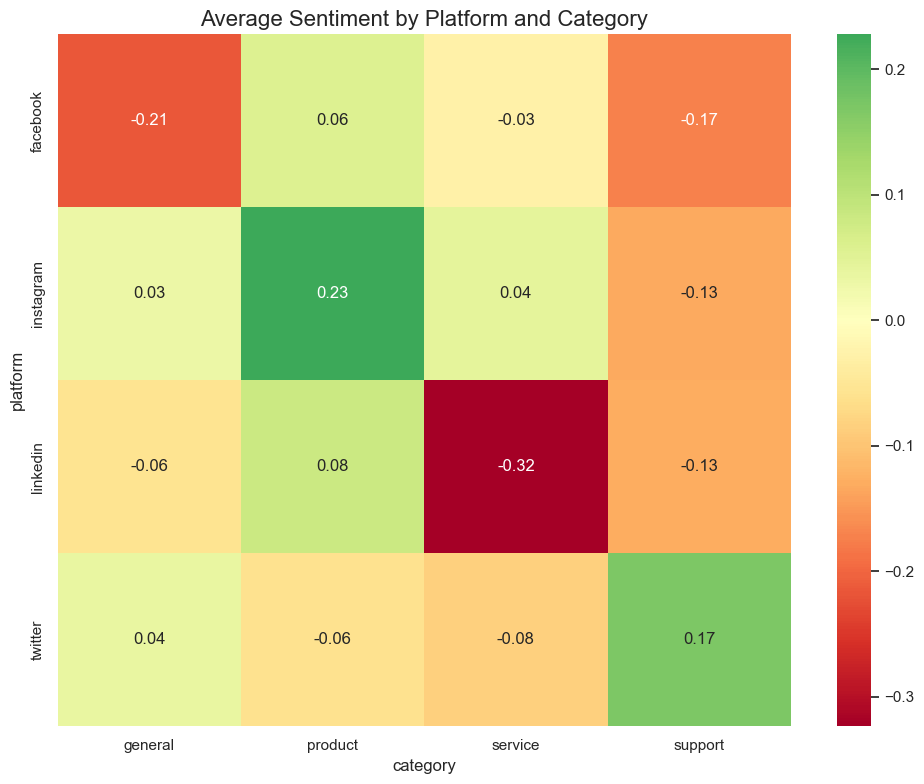

In [6]:
# Check if social media data is loaded
if social_df is not None:
    # 1. Compare engagement metrics across platforms
    plt.figure(figsize=(12, 8))
    
    # Group by platform and calculate metrics
    platform_metrics = social_df.groupby('platform').agg({
        'post_count': 'sum',
        'total_likes': 'sum',
        'total_shares': 'sum',
        'total_comments': 'sum',
        'avg_engagement': 'mean',
        'avg_sentiment': 'mean'
    }).reset_index()
    
    # Create a subplot with 2 rows and 2 columns
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Plot 1: Post Count by Platform
    sns.barplot(x='platform', y='post_count', data=platform_metrics, ax=axes[0, 0])
    axes[0, 0].set_title('Post Count by Platform')
    axes[0, 0].set_xlabel('Platform')
    axes[0, 0].set_ylabel('Number of Posts')
    
    # Plot 2: Average Engagement by Platform
    sns.barplot(x='platform', y='avg_engagement', data=platform_metrics, ax=axes[0, 1])
    axes[0, 1].set_title('Average Engagement Score by Platform')
    axes[0, 1].set_xlabel('Platform')
    axes[0, 1].set_ylabel('Avg Engagement Score')
    
    # Plot 3: Total Likes, Shares, Comments by Platform
    platform_metrics_melted = pd.melt(
        platform_metrics, 
        id_vars=['platform'], 
        value_vars=['total_likes', 'total_shares', 'total_comments'],
        var_name='metric', value_name='value'
    )
    sns.barplot(x='platform', y='value', hue='metric', data=platform_metrics_melted, ax=axes[1, 0])
    axes[1, 0].set_title('Engagement Metrics by Platform')
    axes[1, 0].set_xlabel('Platform')
    axes[1, 0].set_ylabel('Count')
    axes[1, 0].legend(title='Metric')
    
    # Plot 4: Average Sentiment by Platform
    sns.barplot(x='platform', y='avg_sentiment', data=platform_metrics, ax=axes[1, 1])
    axes[1, 1].set_title('Average Sentiment by Platform')
    axes[1, 1].set_xlabel('Platform')
    axes[1, 1].set_ylabel('Avg Sentiment Score')
    
    plt.tight_layout()
    plt.savefig('../visualization/social_media_analysis.png', dpi=300)
    plt.show()
    
    # 2. Create heatmap of sentiment by category and platform
    plt.figure(figsize=(10, 8))
    
    # Group by platform and category to get average sentiment
    sentiment_pivot = social_df.pivot_table(
        index='platform', 
        columns='category', 
        values='avg_sentiment',
        aggfunc='mean'
    )
    
    # Create heatmap
    sns.heatmap(sentiment_pivot, annot=True, cmap='RdYlGn', center=0, fmt='.2f')
    plt.title('Average Sentiment by Platform and Category', fontsize=16)
    plt.tight_layout()
    plt.savefig('../visualization/sentiment_heatmap.png', dpi=300)
    plt.show()
    
    # 3. Create interactive plot of engagement over time
    # Group by date for time series analysis
    daily_engagement = social_df.groupby('date').agg({
        'post_count': 'sum',
        'avg_engagement': 'mean',
        'avg_sentiment': 'mean'
    }).reset_index()
    
    # Create interactive line chart with Plotly
    fig = make_subplots(specs=[[{"secondary_y": True}]])
    
    fig.add_trace(
        go.Scatter(x=daily_engagement['date'], y=daily_engagement['post_count'], name="Post Count"),
        secondary_y=False,
    )
    
    fig.add_trace(
        go.Scatter(x=daily_engagement['date'], y=daily_engagement['avg_engagement'], name="Avg Engagement"),
        secondary_y=True,
    )
    
    fig.update_layout(
        title_text="Post Count and Engagement Over Time",
        template='plotly_white'
    )
    
    fig.update_xaxes(title_text="Date")
    fig.update_yaxes(title_text="Post Count", secondary_y=False)
    fig.update_yaxes(title_text="Average Engagement", secondary_y=True)
    
    fig.show()
    fig.write_html('../visualization/social_engagement_over_time.html')
    
else:
    print("Social media data not available for visualization")

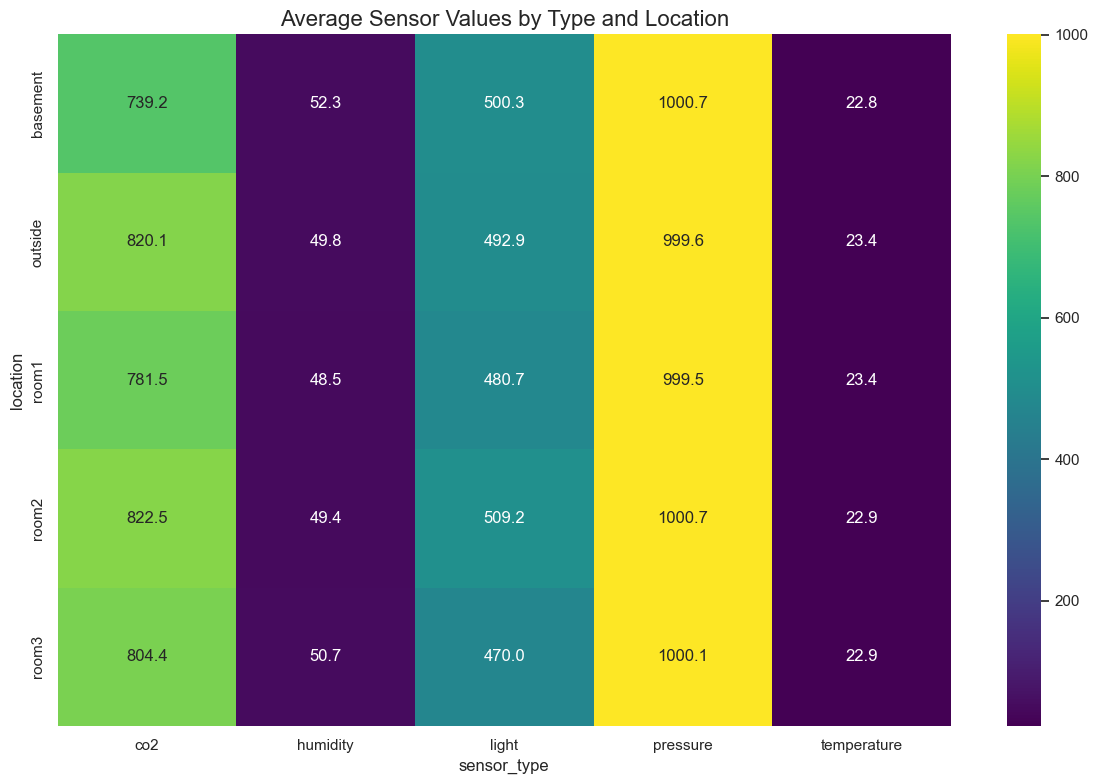

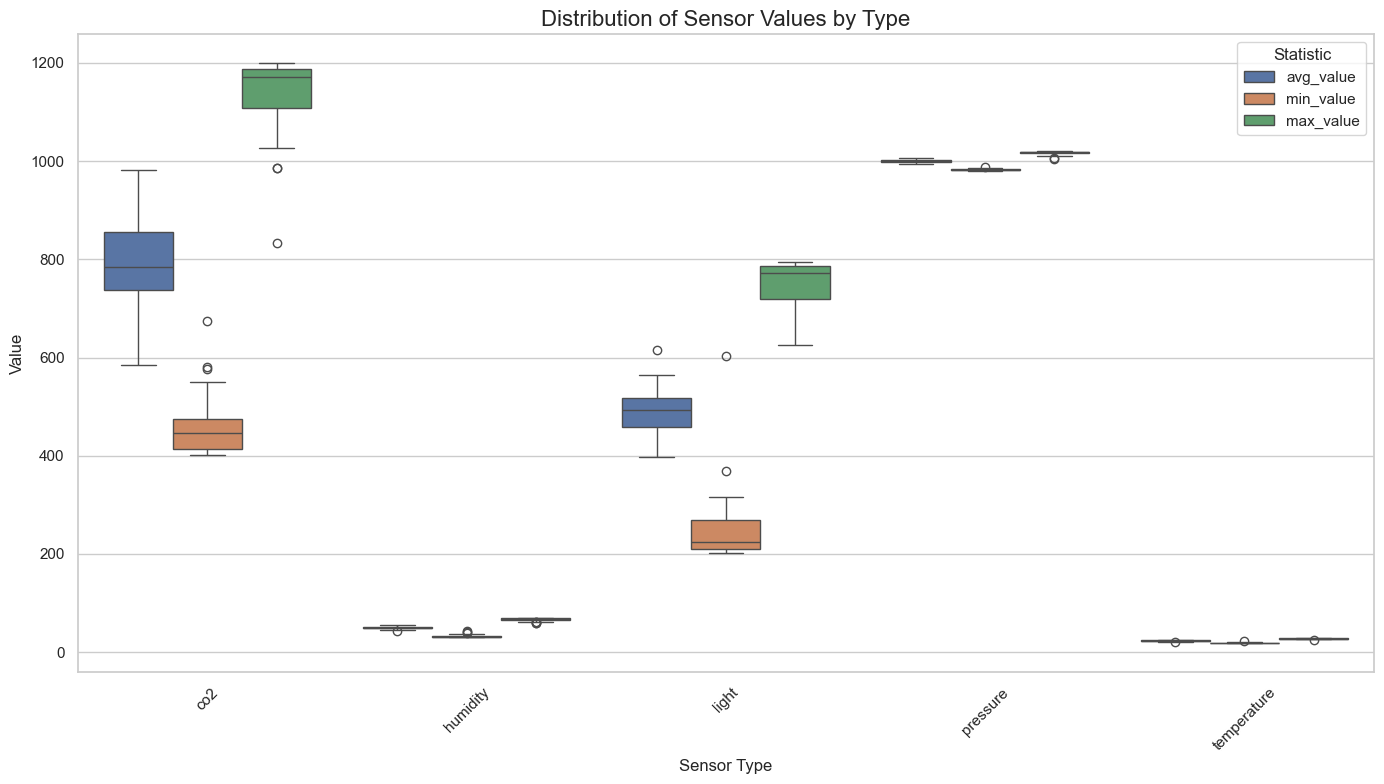

<Figure size 1200x600 with 0 Axes>

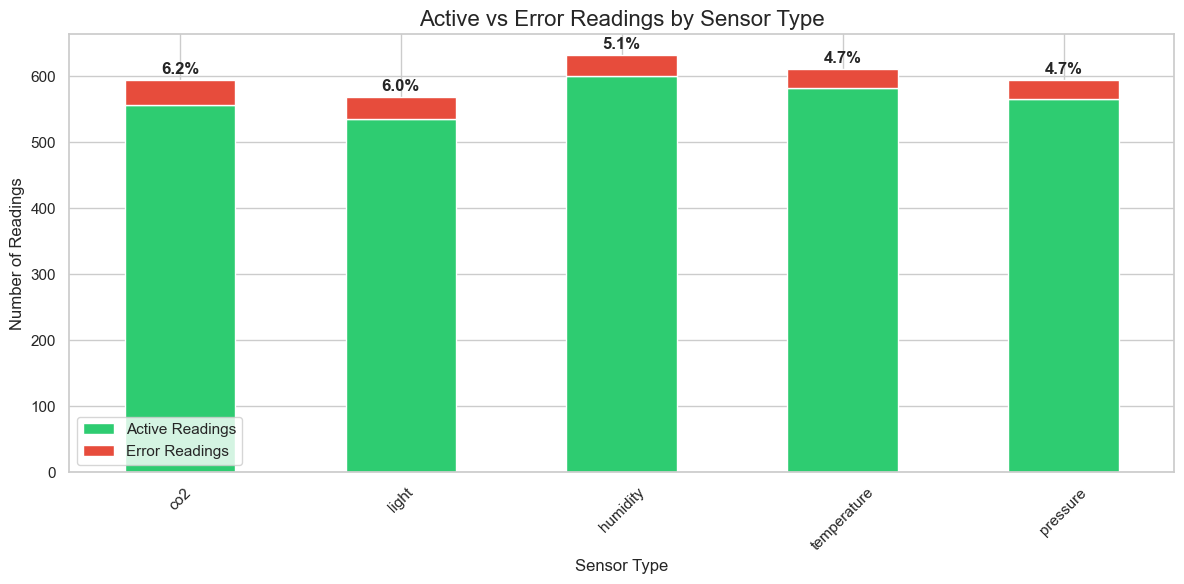

In [7]:
# Check if sensor data is loaded
if sensor_df is not None:
    # 1. Visualize average sensor values by type and location
    plt.figure(figsize=(12, 8))
    
    # Create pivot table of average values by sensor type and location
    sensor_pivot = sensor_df.pivot_table(
        index='location', 
        columns='sensor_type', 
        values='avg_value',
        aggfunc='mean'
    )
    
    # Create heatmap
    sns.heatmap(sensor_pivot, annot=True, cmap='viridis', fmt='.1f')
    plt.title('Average Sensor Values by Type and Location', fontsize=16)
    plt.tight_layout()
    plt.savefig('../visualization/sensor_values_heatmap.png', dpi=300)
    plt.show()
    
    # 2. Create boxplots of sensor values by type
    plt.figure(figsize=(14, 8))
    
    # Melt the dataframe for boxplot
    sensor_melted = pd.melt(
        sensor_df,
        id_vars=['sensor_type'],
        value_vars=['avg_value', 'min_value', 'max_value'],
        var_name='statistic', value_name='value'
    )
    
    # Create boxplot
    sns.boxplot(x='sensor_type', y='value', hue='statistic', data=sensor_melted)
    plt.title('Distribution of Sensor Values by Type', fontsize=16)
    plt.xlabel('Sensor Type', fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title='Statistic')
    plt.tight_layout()
    plt.savefig('../visualization/sensor_value_distribution.png', dpi=300)
    plt.show()
    
    # 3. Create stacked bar chart of active vs error readings
    plt.figure(figsize=(12, 6))
    
    # Group by sensor type
    sensor_status = sensor_df.groupby('sensor_type').agg({
        'active_readings': 'sum',
        'error_readings': 'sum'
    }).reset_index()
    
    # Calculate total readings and error rate
    sensor_status['total_readings'] = sensor_status['active_readings'] + sensor_status['error_readings']
    sensor_status['error_rate'] = sensor_status['error_readings'] / sensor_status['total_readings'] * 100
    
    # Sort by error rate
    sensor_status = sensor_status.sort_values('error_rate', ascending=False)
    
    # Create stacked bar chart
    ax = sensor_status.plot(x='sensor_type', y=['active_readings', 'error_readings'], 
                         kind='bar', stacked=True, figsize=(12, 6),
                         color=['#2ecc71', '#e74c3c'])
    
    # Add error rate labels
    for i, row in enumerate(sensor_status.itertuples()):
        ax.text(i, row.total_readings + 5, f'{row.error_rate:.1f}%', 
               ha='center', va='bottom', fontweight='bold')
    
    plt.title('Active vs Error Readings by Sensor Type', fontsize=16)
    plt.xlabel('Sensor Type', fontsize=12)
    plt.ylabel('Number of Readings', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(['Active Readings', 'Error Readings'])
    plt.tight_layout()
    plt.savefig('../visualization/sensor_status.png', dpi=300)
    plt.show()
    
    # 4. Create interactive time series of sensor values
    # Group by date and sensor type
    daily_sensor = sensor_df.groupby(['date', 'sensor_type']).agg({
        'avg_value': 'mean'
    }).reset_index()
    
    # Create interactive line chart with Plotly
    fig = px.line(daily_sensor, x='date', y='avg_value', color='sensor_type',
                 title='Average Sensor Values Over Time')
    
    fig.update_layout(
        xaxis_title='Date',
        yaxis_title='Average Value',
        template='plotly_white'
    )
    
    fig.show()
    fig.write_html('../visualization/sensor_values_time_series.html')
    
else:
    print("Sensor data not available for visualization")

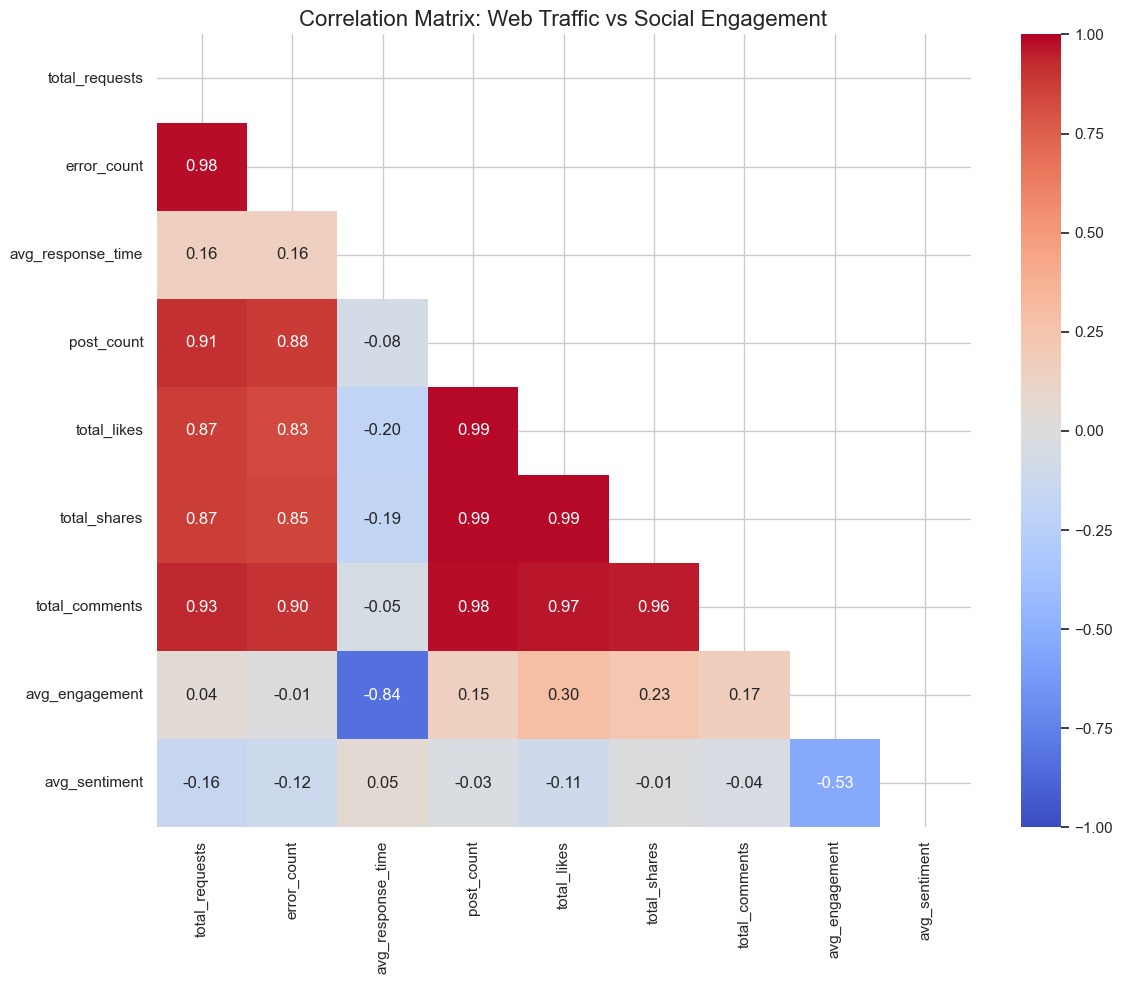

<Figure size 1600x1200 with 0 Axes>

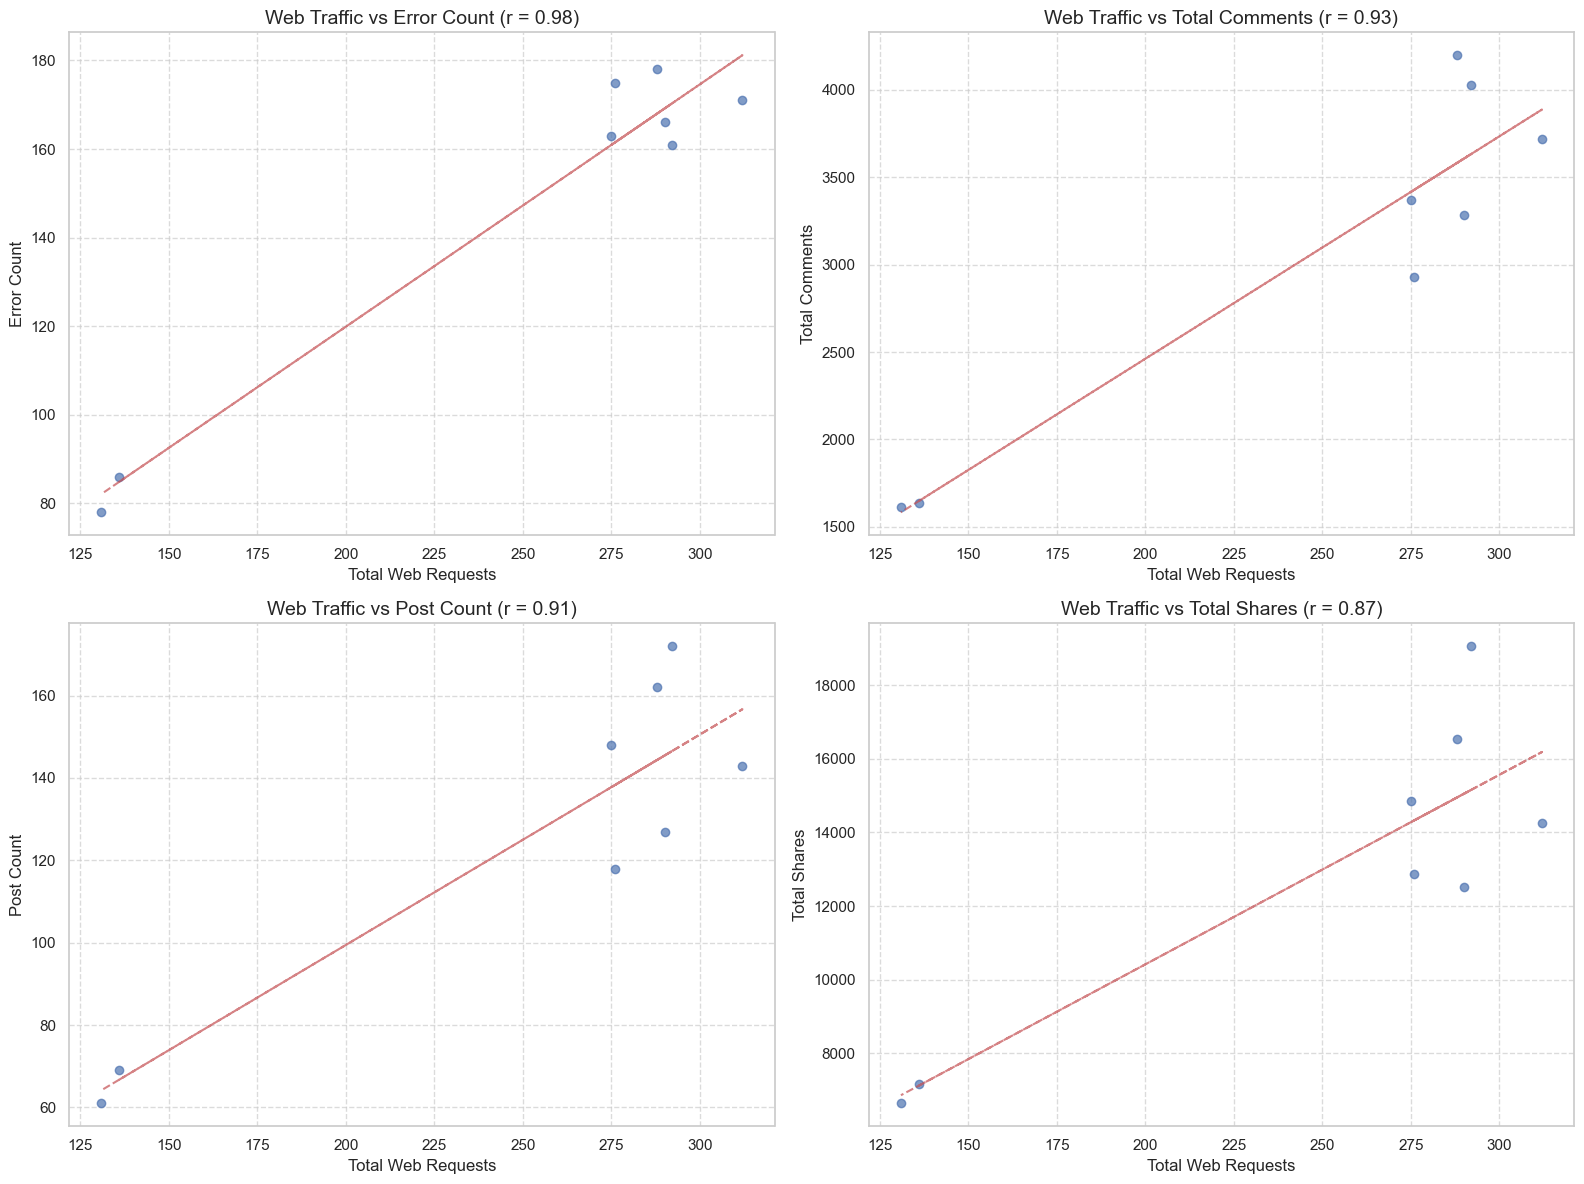

In [8]:
# Check if correlation data is loaded
if correlation_df is not None:
    # 1. Create correlation matrix
    plt.figure(figsize=(12, 10))
    
    # Calculate correlation matrix (excluding date column)
    corr_matrix = correlation_df.drop('date', axis=1).corr()
    
    # Create heatmap
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
    plt.title('Correlation Matrix: Web Traffic vs Social Engagement', fontsize=16)
    plt.tight_layout()
    plt.savefig('../visualization/correlation_matrix.png', dpi=300)
    plt.show()
    
    # 2. Create scatter plots for the most correlated variables
    plt.figure(figsize=(16, 12))
    
    # Get top 4 correlations with web traffic (excluding self-correlations)
    web_correlations = corr_matrix['total_requests'].drop('total_requests').abs().sort_values(ascending=False).head(4)
    
    # Create subplots for top correlations
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()
    
    for i, (var, corr) in enumerate(web_correlations.items()):
        axes[i].scatter(correlation_df['total_requests'], correlation_df[var], alpha=0.7)
        axes[i].set_title(f'Web Traffic vs {var.replace("_", " ").title()} (r = {corr_matrix["total_requests"][var]:.2f})', fontsize=14)
        axes[i].set_xlabel('Total Web Requests', fontsize=12)
        axes[i].set_ylabel(var.replace('_', ' ').title(), fontsize=12)
        axes[i].grid(True, linestyle='--', alpha=0.7)
        
        # Add trend line
        z = np.polyfit(correlation_df['total_requests'], correlation_df[var], 1)
        p = np.poly1d(z)
        axes[i].plot(correlation_df['total_requests'], p(correlation_df['total_requests']), 'r--', alpha=0.7)
    
    plt.tight_layout()
    plt.savefig('../visualization/web_traffic_correlations.png', dpi=300)
    plt.show()
    
    # 3. Create interactive time series comparison
    # Normalize the variables for comparison
    norm_df = correlation_df.copy()
    for col in ['total_requests', 'post_count', 'avg_engagement', 'avg_sentiment']:
        norm_df[f'{col}_norm'] = (norm_df[col] - norm_df[col].min()) / (norm_df[col].max() - norm_df[col].min())
    
    # Create interactive line chart with Plotly
    fig = go.Figure()
    
    fig.add_trace(go.Scatter(
        x=norm_df['date'],
        y=norm_df['total_requests_norm'],
        name='Web Traffic (normalized)',
        line=dict(color='blue')
    ))
    
    fig.add_trace(go.Scatter(
        x=norm_df['date'],
        y=norm_df['post_count_norm'],
        name='Social Post Count (normalized)',
        line=dict(color='orange')
    ))
    
    fig.add_trace(go.Scatter(
        x=norm_df['date'],
        y=norm_df['avg_engagement_norm'],
        name='Avg Engagement (normalized)',
        line=dict(color='green')
    ))
    
    fig.update_layout(
        title='Normalized Comparison: Web Traffic vs Social Media Activity',
        xaxis_title='Date',
        yaxis_title='Normalized Value',
        template='plotly_white'
    )
    
    fig.show()
    fig.write_html('../visualization/traffic_social_comparison.html')
    
else:
    print("Correlation data not available for visualization")